In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.1 MB/s eta 0:00:00


In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [4]:
fwei=ctrl.Antecedent(np.arange(0,1000.1,0.1),'Food Weigh')
ftyp=ctrl.Antecedent(np.arange(0,100.1,0.1),'Food Type')
temp=ctrl.Antecedent(np.arange(0,10.1,0.1),'Food Temperature')

time=ctrl.Consequent(np.arange(0,100.1,0.1),'Cooking Time')
hlev=ctrl.Consequent(np.arange(0,100.1,0.1),'Heat Level')

In [5]:
fwei['low']=fuzz.gaussmf(fwei.universe,0,250)
fwei['mid']=fuzz.gaussmf(fwei.universe,500,250)
fwei['high']=fuzz.gaussmf(fwei.universe,1000,250)

In [6]:
ftyp['low']=fuzz.gaussmf(ftyp.universe,0,25)
ftyp['mid']=fuzz.gaussmf(ftyp.universe,50,25)
ftyp['high']=fuzz.gaussmf(ftyp.universe,100,25)

In [7]:
temp['low']=fuzz.gaussmf(temp.universe,0,10)
temp['mid']=fuzz.gaussmf(temp.universe,25,15)
temp['high']=fuzz.gaussmf(temp.universe,50,25)

In [8]:
time['low']=fuzz.gaussmf(time.universe,0,25)
time['mid']=fuzz.gaussmf(time.universe,50,25)
time['high']=fuzz.gaussmf(time.universe,100,25)

In [9]:
hlev['low']=fuzz.gaussmf(hlev.universe,30,15)
hlev['mid']=fuzz.gaussmf(hlev.universe,60,25)
hlev['high']=fuzz.gaussmf(hlev.universe,100,30)

In [10]:
rule1=ctrl.Rule(fwei['low'],time['low'])
rule2=ctrl.Rule(fwei['mid'],time['mid'])
rule3=ctrl.Rule(fwei['high'],time['high'])

In [11]:
rule4=ctrl.Rule(ftyp['low'],hlev['low'])
rule5=ctrl.Rule(ftyp['mid'],hlev['mid'])
rule6=ctrl.Rule(ftyp['high'],hlev['high'])

In [12]:
rule7=ctrl.Rule(temp['low'],time['high'])
rule8=ctrl.Rule(temp['mid'],time['mid'])
rule9=ctrl.Rule(temp['high'],time['low'])

In [13]:
rule10=ctrl.Rule(fwei['high']&ftyp['high']&temp['low'],[time['high'],hlev['high']])
rule11=ctrl.Rule(fwei['mid']&ftyp['low']&temp['mid'],[time['mid'],hlev['low']])
rule12=ctrl.Rule(fwei['low']&ftyp['mid']&temp['high'],[time['low'],hlev['mid']])

53.59726668082708
61.6549887873387


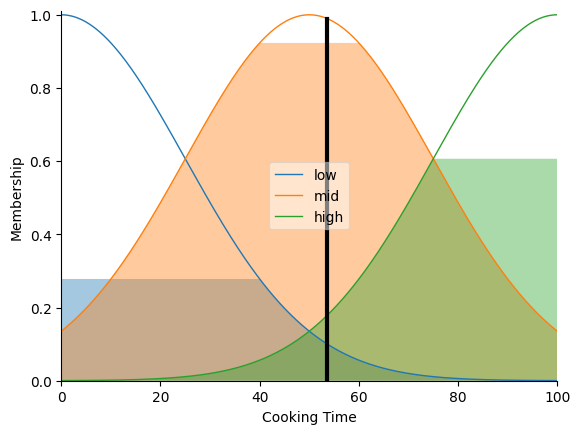

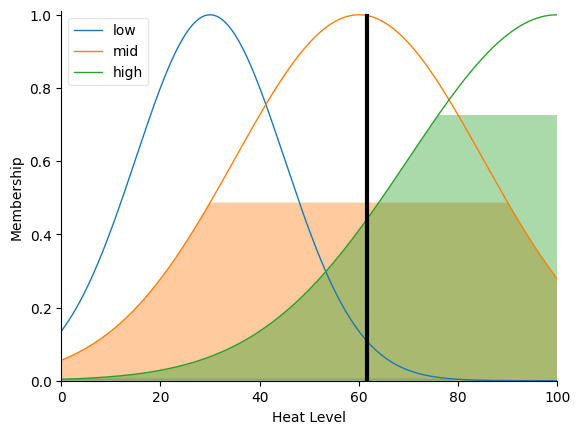

In [14]:
tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['Food Weigh']=400
tipping.input['Food Type']=80
tipping.input['Food Temperature']=60
tipping.compute()
print(tipping.output['Cooking Time'])
print(tipping.output['Heat Level'])
time.view(sim=tipping)
hlev.view(sim=tipping)